## UFO Data - Handling Time Day of Week etc

In [ ]:
# How many colors were reported and what were they? What were top 3 most reported colors
# What were top 3 cities that had the most sightings?
# What time of day had the most sightings?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [12]:
colors = ufo['Colors Reported'].value_counts()
icount = 3
for i, v in colors.iteritems():
    if icount > 0: print(i,  v)
    icount = icount - 1
        
    


RED 780
GREEN 531
ORANGE 528


In [14]:
ufo['Colors Reported'].isnull().sum(axis = 0)
ufo.isnull().sum(axis = 0)

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [6]:
colors = ufo['Colors Reported'].value_counts()
ufo.isnull().sum(axis = 0)
ufo['Colors Reported'].isnull().sum(axis = 0)

15359

In [57]:
cities = ufo['City'].value_counts()
icount = 3
for i, v in cities.iteritems():
    if icount > 0: print(i,  v)
    icount = icount - 1
        

Seattle 187
New York City 161
Phoenix 137


In [68]:
hours = ufo['Time'].dt.hour.value_counts()
hours[22]


2329

In [44]:
# We need to count the colors but not the NaN

colors = ufo['Colors Reported'].unique()
print(f'The number or colors was {len(colors)-1} and they were {colors[1:]}')
ufo['Colors Reported'].value_counts()

The number or colors was 27 and they were ['RED' 'GREEN' 'BLUE' 'ORANGE' 'YELLOW' 'ORANGE YELLOW' 'RED GREEN'
 'RED BLUE' 'RED ORANGE' 'RED GREEN BLUE' 'RED YELLOW GREEN' 'RED YELLOW'
 'GREEN BLUE' 'ORANGE GREEN BLUE' 'ORANGE GREEN' 'YELLOW GREEN'
 'RED YELLOW BLUE' 'ORANGE BLUE' 'RED YELLOW GREEN BLUE'
 'YELLOW GREEN BLUE' 'RED ORANGE YELLOW' 'RED ORANGE YELLOW BLUE'
 'YELLOW BLUE' 'RED ORANGE GREEN' 'RED ORANGE BLUE' 'ORANGE YELLOW GREEN'
 'ORANGE YELLOW BLUE']


RED                       780
GREEN                     531
ORANGE                    528
BLUE                      450
YELLOW                    169
RED GREEN                  89
RED BLUE                   78
RED ORANGE                 44
GREEN BLUE                 34
RED GREEN BLUE             33
ORANGE YELLOW              26
RED YELLOW                 25
ORANGE GREEN               23
YELLOW GREEN               17
ORANGE BLUE                10
RED YELLOW GREEN            9
YELLOW BLUE                 6
YELLOW GREEN BLUE           5
ORANGE GREEN BLUE           5
RED YELLOW GREEN BLUE       4
RED ORANGE YELLOW           4
RED ORANGE BLUE             3
RED YELLOW BLUE             3
RED ORANGE GREEN            3
RED ORANGE YELLOW BLUE      1
ORANGE YELLOW BLUE          1
ORANGE YELLOW GREEN         1
Name: Colors Reported, dtype: int64

In [4]:
cities = ufo['City'].unique()
cityCounts = ufo['City'].value_counts()
cityCounts

Seattle             187
New York City       161
Phoenix             137
Houston             108
Las Vegas           105
                   ... 
Gaithersberg          1
Havensville           1
Snelling              1
Watson                1
Capulin Mountain      1
Name: City, Length: 6476, dtype: int64

In [11]:
# time of day.  convert dt to hours then find what hour most sightings
ufo['Time'].dt.hour.value_counts()

21    2447
22    2329
20    1829
23    1699
19    1354
0     1207
18     975
1      818
2      688
17     607
3      515
16     412
12     394
13     377
15     372
14     355
4      327
5      317
10     256
11     227
6      210
9      188
7      186
8      152
Name: Time, dtype: int64

type(ufo['Time'])
ufo['Time'].dt.dayofweek.plot(kind='hist')

In [3]:
## write ufo data to json file

In [11]:
ufo.to_json('ufoepoch.json', date_format='iso')  
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ufo2 = pd.read_json('ufoepoch.json')
print(ufo2['Time'])

0        1930-06-01T22:00:00.000Z
1        1930-06-30T20:00:00.000Z
2        1931-02-15T14:00:00.000Z
3        1931-06-01T13:00:00.000Z
4        1933-04-18T19:00:00.000Z
                   ...           
18236    2000-12-31T23:00:00.000Z
18237    2000-12-31T23:00:00.000Z
18238    2000-12-31T23:45:00.000Z
18239    2000-12-31T23:45:00.000Z
18240    2000-12-31T23:59:00.000Z
Name: Time, Length: 18241, dtype: object


In [18]:
ufo2['Time'] = pd.to_datetime(ufo2['Time'])  # change ISO time to a datetime object
ufo2

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,None,TRIANGLE,NY,1930-06-01 22:00:00+00:00
1,Willingboro,None,OTHER,NJ,1930-06-30 20:00:00+00:00
2,Holyoke,None,OVAL,CO,1931-02-15 14:00:00+00:00
3,Abilene,None,DISK,KS,1931-06-01 13:00:00+00:00
4,New York Worlds Fair,None,LIGHT,NY,1933-04-18 19:00:00+00:00
...,...,...,...,...,...
18236,Grant Park,None,TRIANGLE,IL,2000-12-31 23:00:00+00:00
18237,Spirit Lake,None,DISK,IA,2000-12-31 23:00:00+00:00
18238,Eagle River,None,None,WI,2000-12-31 23:45:00+00:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00+00:00


## Series and value_counts() for items in the array

In [58]:
days = ['S','M','T','W','T','F','SA']
ufo2['Day']= ufo2['Time'].dt.dayofweek.values
# change integer day to letter value
ufo2['Day'] = pd.Series(list(map(lambda x: days[x], ufo2['Time'].dt.dayofweek.values)))
ufo2

,City,Colors Reported,Shape Reported,State,Time,Day
0,Ithaca,None,TRIANGLE,NY,1930-06-01 22:00:00+00:00,SA
1,Willingboro,None,OTHER,NJ,1930-06-30 20:00:00+00:00,S
2,Holyoke,None,OVAL,CO,1931-02-15 14:00:00+00:00,SA
3,Abilene,None,DISK,KS,1931-06-01 13:00:00+00:00,S
4,New York Worlds Fair,None,LIGHT,NY,1933-04-18 19:00:00+00:00,M
...,...,...,...,...,...,...
18236,Grant Park,None,TRIANGLE,IL,2000-12-31 23:00:00+00:00,SA
18237,Spirit Lake,None,DISK,IA,2000-12-31 23:00:00+00:00,SA
18238,Eagle River,None,None,WI,2000-12-31 23:45:00+00:00,SA
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00+00:00,SA


T     5145
M     2822
SA    2689
F     2687
W     2598
S     2300
Name: Day, dtype: int64

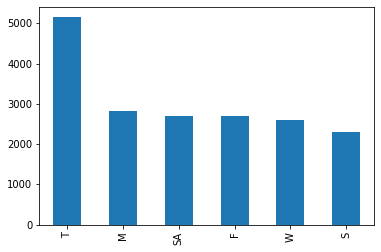

In [59]:
y=ufo2['Day'].value_counts()
y.plot(kind='bar')
y

<AxesSubplot:>

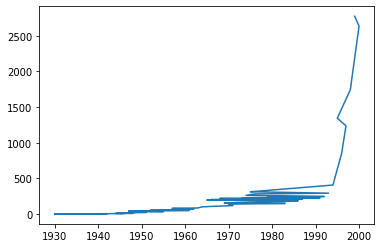

In [32]:
z = pd.DatetimeIndex(ufo2['Time']).year.value_counts()
z.plot(kind='line')

### Handling Time - Datetime and Unix Time

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])
time = ufo['Time'].iloc[0]
print(f'Aware of time zone: {time.tzinfo is not None and time.tzinfo.utcoffset(time) is not None}')
time

Aware of time zone: False


Timestamp('1930-06-01 22:00:00')

In [85]:
import datetime as dt
import pytz
time = dt.datetime.now()

timezone = pytz.timezone("America/New_York")
time_aware = timezone.localize(time)
time_aware
pytz.all_timezones

593

In [ ]:
print(f'zone aware datetime object: {time_aware.tzinfo}')
print(f'time: {time}')
print(f'date: {time.date()}')
print(f'time.time: {time.time()}')
print(f'tzinfo: {time_aware.tzinfo}')
print(time.strftime("%X"))
print(time.strftime("%c"))
time.tzinfo

In [44]:
from tzlocal import get_localzone
tz = get_localzone()
get_localzone()

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>